## Appendix: Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#parameters 
k = 0.3
n = 2
V_0 = -70 #mV
V_rest = -70 #mV
tau_e = 20 #ms
tau_i = 10 #ms
dt = 1 #ms

W_ee = 1.25
W_ei = 0.65
W_ii = 0.5
W_ie = 1.2

### 1. Plot of the Transfer Function

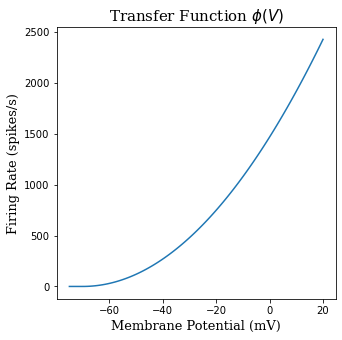

In [3]:
def phi(V):
    if (V-V_0) > 0 :
        return k*((V-V_0)**n)
    else:
        return 0 

V_plot = np.linspace(-75,20,100) 


phi_plot = np.zeros(len(V_plot))

for i in range(len(V_plot)):
    phi_plot[i] = phi(V_plot[i])



font = {'fontname': 'serif'}


fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.plot(V_plot, phi_plot)
ax.set_title('Transfer Function $\phi (V)$',fontsize = 15,**font)
ax.set_xlabel('Membrane Potential (mV)',fontsize = 13,**font)
ax.set_ylabel('Firing Rate (spikes/s)',fontsize = 13,**font)
plt.show()

## 2. Plots Membrane Potential and Firing Rate

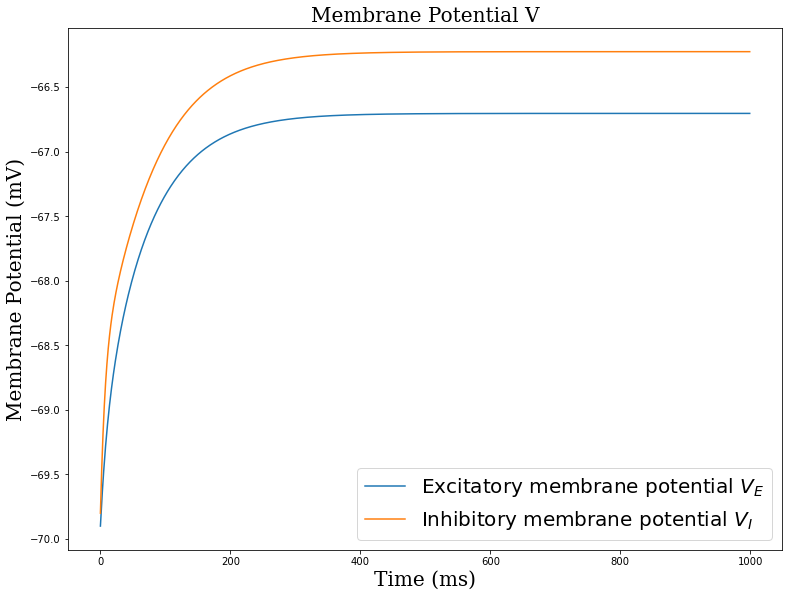

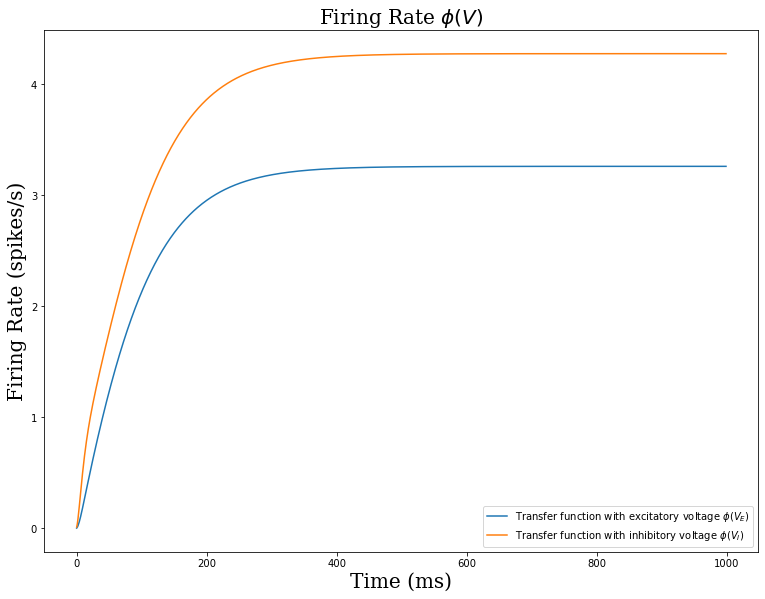

In [4]:
#parameters
N_t = 1000
u_e = 2
u_i = 2

V_e = np.zeros(N_t+1)
V_i = np.zeros(N_t+1)
phi_e = np.zeros(N_t+1)
phi_i = np.zeros(N_t+1)

#Initial conditions
V_e[0] = V_rest 
V_i[0] = V_rest 

#Euler method
for t in range(1,N_t+1):
    
    V_e[t] = np.copy(V_e[t-1] + (dt/tau_e)*(-(V_e[t-1] - V_rest) + W_ee*phi(V_e[t-1]) - W_ei*phi(V_i[t-1]) + u_e))
    
    phi_e[t] = np.copy(phi(V_e[t]))
    
    V_i[t] = np.copy(V_i[t-1] + (dt/tau_i)*(-(V_i[t-1] - V_rest) + W_ie*phi(V_e[t-1]) - W_ii*phi(V_i[t-1]) + u_i))
    
    phi_i[t] = np.copy(phi(V_i[t]))
   
    
#Plots
f1,ax = plt.subplots(figsize=(12.8, 9.6));
ax.plot(np.arange(0,N_t*dt, dt),V_e[1:],label = 'Excitatory membrane potential $V_{E}$')
ax.plot(np.arange(0,N_t*dt, dt),V_i[1:],label = 'Inhibitory membrane potential $V_{I}$')
ax.legend(fontsize=20)
plt.title("Membrane Potential V",fontsize=20,**font)
plt.xlabel("Time (ms)",fontsize=20,**font)
plt.ylabel("Membrane Potential (mV)",fontsize=20,**font)
plt.show()

f2,ax = plt.subplots(figsize=(12.8, 9.6));
ax.plot(np.arange(0,N_t*dt, dt),phi_e[1:],label = 'Transfer function with excitatory voltage $\phi(V_{E})$')
ax.plot(np.arange(0,N_t*dt, dt),phi_i[1:],label = 'Transfer function with inhibitory voltage $\phi(V_{I})$')
ax.legend(fontsize=10)
plt.title("Firing Rate $\phi(V)$",fontsize=20,**font)
plt.xlabel("Time (ms)",fontsize=20,**font)
plt.ylabel("Firing Rate (spikes/s)",fontsize=20,**font)
plt.show()



## 3. Simulation to investigate the effect of the strength of the feedforward inputs on the Membrane Potential and the Firing Rate

In [1]:
#Varying the feedforward input
N_t = 1000
u_e = np.array([-50,-10,-1,0,1,10,50])
u_i = np.array([-50,-10,-1,0,1,10,50])

for a in range(len(u_e)):
    for b in range(len(u_i)):
        
        V_e = np.zeros(N_t+1)
        V_i = np.zeros(N_t+1)
        phi_e = np.zeros(N_t+1)
        phi_i = np.zeros(N_t+1)

        #Initial conditions
        V_e[0] = V_rest 
        V_i[0] = V_rest 

        #Euler method
        for t in range(1,N_t+1):

            V_e[t] = np.copy(V_e[t-1] + (dt/tau_e)*(-(V_e[t-1] - V_rest) + W_ee*phi(V_e[t-1]) - W_ei*phi(V_i[t-1]) + u_e[a]))

            phi_e[t] = np.copy(phi(V_e[t]))

            V_i[t] = np.copy(V_i[t-1] + (dt/tau_i)*(-(V_i[t-1] - V_rest) + W_ie*phi(V_e[t-1]) - W_ii*phi(V_i[t-1]) + u_i[b]))

            phi_i[t] = np.copy(phi(V_i[t]))


        #Plots
        f1,ax = plt.subplots(figsize=(7.2, 5));
        ax.plot(np.arange(0,N_t*dt, dt),V_e[1:],label = 'Excitatory membrane potential $V_{E}$')
        ax.plot(np.arange(0,N_t*dt, dt),V_i[1:],label = 'Inhibitory membrane potential $V_{I}$')
        ax.legend(fontsize=10)
        plt.title("Membrane Potential V, with $u_{E}$ = " + str(u_e[a]) + " and $u_{I}$ = " + str(u_i[b]),fontsize=12,**font)
        plt.xlabel("Time (ms)",fontsize=12,**font)
        plt.ylabel("Membrane Potential (mV)",fontsize=12,**font)
        plt.show()

        f2,ax = plt.subplots(figsize=(7.2, 5));
        ax.plot(np.arange(0,N_t*dt, dt),phi_e[1:],label = 'Transfer function with excitatory voltage $\phi(V_{E})$')
        ax.plot(np.arange(0,N_t*dt, dt),phi_i[1:],label = 'Transfer function with inhibitory voltage $\phi(V_{I})$')
        ax.legend(fontsize=10)
        plt.title("Firing Rate $\phi(V)$, with $u_{E}$ = " + str(u_e[a]) + " and $u_{I}$ = " + str(u_i[b]),fontsize=12,**font)
        plt.xlabel("Time (ms)",fontsize=12,**font)
        plt.ylabel("Firing Rate (spikes/s)",fontsize=12,**font)
        plt.show()      

NameError: name 'np' is not defined

## 4. Simulation to investigate the effect of adding Gaussian noise to the feedforward inputs, on the Membrane Potential and the Firing Rate

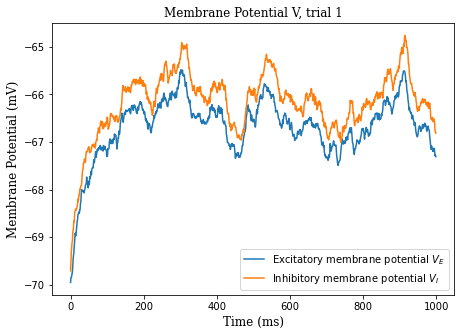

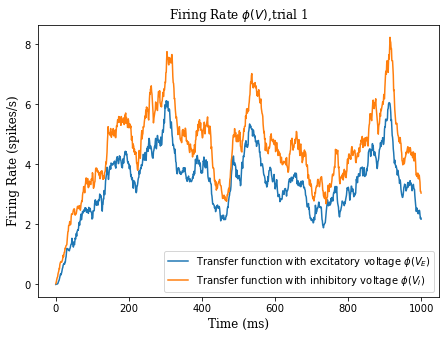

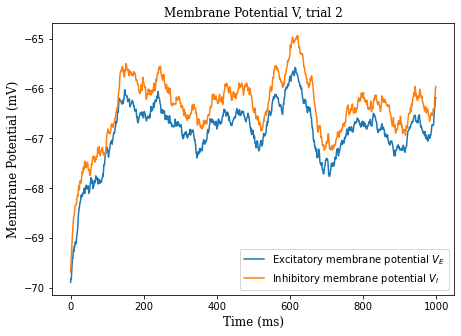

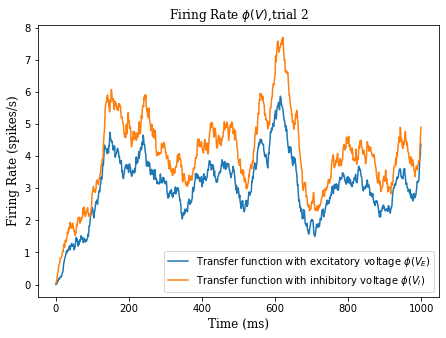

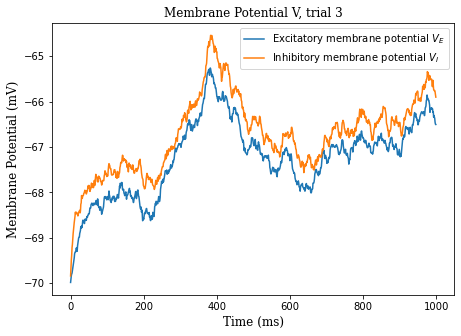

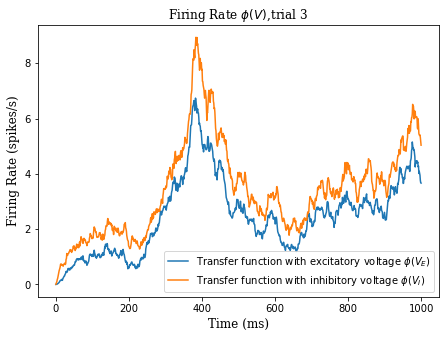

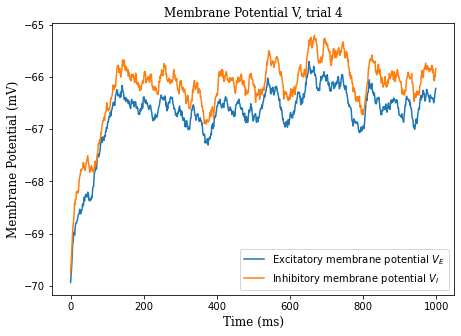

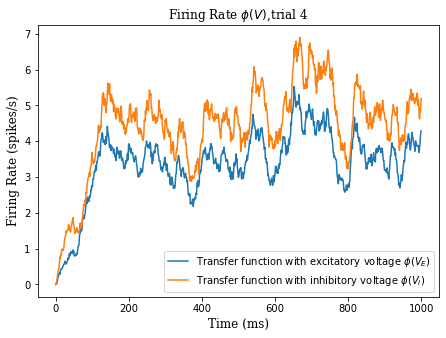

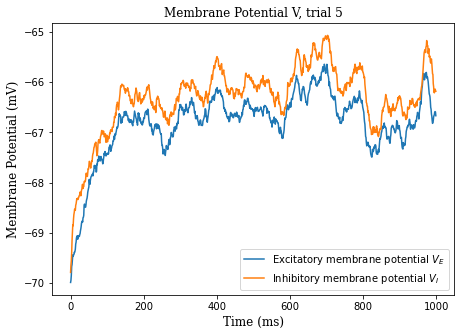

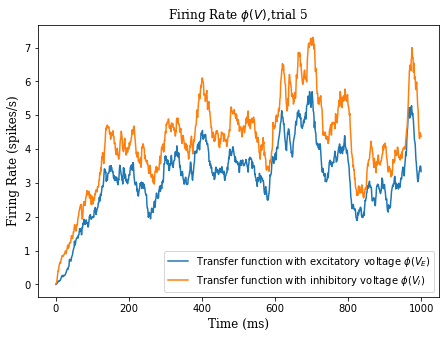

In [12]:
#parameters
N_t = 1000
mu_e = 2
mu_i = 2

sigma_e = 1
sigma_i = 0.5 


V_e = np.zeros(N_t+1)
V_i = np.zeros(N_t+1)
phi_e = np.zeros(N_t+1)
phi_i = np.zeros(N_t+1)

#Initial conditions
V_e[0] = V_rest 
V_i[0] = V_rest 

#Repeat the precedure 5 times
trial =np.array([1,2,3,4,5])

for i in range(len(trial)):
#Euler method
    for t in range(1,N_t+1):

        V_e[t] = np.copy(V_e[t-1] + (dt/tau_e)*(-(V_e[t-1] - V_rest) 
                                                + W_ee*phi(V_e[t-1]) - W_ei*phi(V_i[t-1]) + mu_e + sigma_e*np.random.randn()))

        phi_e[t] = np.copy(phi(V_e[t]))

        V_i[t] = np.copy(V_i[t-1] + (dt/tau_i)*(-(V_i[t-1] - V_rest) 
                                                + W_ie*phi(V_e[t-1]) - W_ii*phi(V_i[t-1]) + mu_i + sigma_i*np.random.randn()))

        phi_i[t] = np.copy(phi(V_i[t]))


    #Plots
    f1,ax = plt.subplots(figsize=(7.2, 5));
    ax.plot(np.arange(0,N_t*dt, dt),V_e[1:],label = 'Excitatory membrane potential $V_{E}$')
    ax.plot(np.arange(0,N_t*dt, dt),V_i[1:],label = 'Inhibitory membrane potential $V_{I}$')
    ax.legend(fontsize=10)
    plt.title("Membrane Potential V, trial "+str(trial[i]),fontsize=12,**font)
    plt.xlabel("Time (ms)",fontsize=12,**font)
    plt.ylabel("Membrane Potential (mV)",fontsize=12,**font)
    plt.show()

    f2,ax = plt.subplots(figsize=(7.2, 5));
    ax.plot(np.arange(0,N_t*dt, dt),phi_e[1:],label = 'Transfer function with excitatory voltage $\phi(V_{E})$')
    ax.plot(np.arange(0,N_t*dt, dt),phi_i[1:],label = 'Transfer function with inhibitory voltage $\phi(V_{I})$')
    ax.legend(fontsize=10)
    plt.title("Firing Rate $\phi(V)$,trial "+str(trial[i]),fontsize=12,**font)
    plt.xlabel("Time (ms)",fontsize=12,**font)
    plt.ylabel("Firing Rate (spikes/s)",fontsize=12,**font)
    plt.show()

## 5. Simulation of a protocol in which the mean of the feedforward input changes every 3 seconds

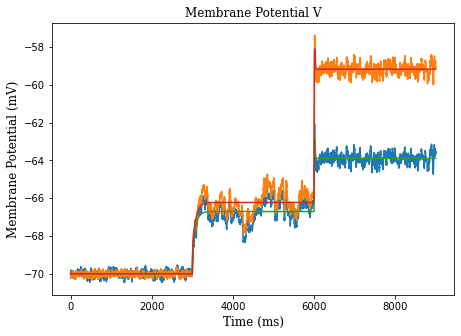

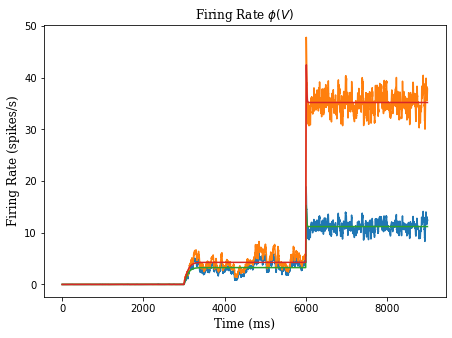

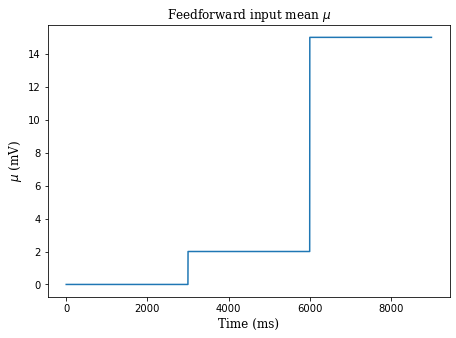

In [7]:
N_t = 9000
mu = np.array([0,2,15])

sigma_e = 1
sigma_i = 0.5 


V_e_noise = np.zeros(N_t+1)
V_i_noise = np.zeros(N_t+1)
V_e = np.zeros(N_t+1)
V_i = np.zeros(N_t+1)

phi_e_noise = np.zeros(N_t+1)
phi_i_noise = np.zeros(N_t+1)
phi_e = np.zeros(N_t+1)
phi_i = np.zeros(N_t+1)

#Initial conditions
V_e_noise[0] = V_rest 
V_i_noise[0] = V_rest
V_e[0] = V_rest 
V_i[0] = V_rest 


#Euler method

counter = 0 

for t in range(1,N_t+1):
    
    counter+=1
    
    if counter <= 3000:
        mu_e = mu[0]
        mu_i = mu[0]
    elif counter > 3000 and counter <= 6000:
        mu_e = mu[1]
        mu_i = mu[1]
    else:
        mu_e = mu[2]
        mu_i = mu[2] 
        
    #With noise
    V_e_noise[t] = np.copy(V_e_noise[t-1] + (dt/tau_e)*(-(V_e_noise[t-1] - V_rest) 
                                                        + W_ee*phi(V_e_noise[t-1]) - W_ei*phi(V_i_noise[t-1]) 
                                                        + mu_e + sigma_e*np.random.randn()))
    
    phi_e_noise[t] = np.copy(phi(V_e_noise[t]))
    
    V_i_noise[t] = np.copy(V_i_noise[t-1] + (dt/tau_i)*(-(V_i_noise[t-1] - V_rest) 
                                            + W_ie*phi(V_e_noise[t-1]) - W_ii*phi(V_i_noise[t-1]) 
                                                        + mu_i + sigma_i*np.random.randn()))
    
    phi_i_noise[t] = np.copy(phi(V_i_noise[t]))
    
    #Without noise
    V_e[t] = np.copy(V_e[t-1] + (dt/tau_e)*(-(V_e[t-1] - V_rest) 
                                            + W_ee*phi(V_e[t-1]) - W_ei*phi(V_i[t-1]) 
                                                       + mu_e))
    
    phi_e[t] = np.copy(phi(V_e[t]))
    
    V_i[t] = np.copy(V_i[t-1] + (dt/tau_i)*(-(V_i[t-1] - V_rest) 
                                            + W_ie*phi(V_e[t-1]) - W_ii*phi(V_i[t-1]) 
                                                        + mu_i))
    
    phi_i[t] = np.copy(phi(V_i[t]))
   
    
#Plots
f1,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(np.arange(0,N_t*dt, dt),V_e_noise[1:],label = 'Excitatory membrane potential $V_{E}$ with noise')
ax.plot(np.arange(0,N_t*dt, dt),V_i_noise[1:],label = 'Inhibitory membrane potential $V_{I}$ with noise')
ax.plot(np.arange(0,N_t*dt, dt),V_e[1:],label = 'Excitatory membrane potential $V_{E}$')
ax.plot(np.arange(0,N_t*dt, dt),V_i[1:],label = 'Inhibitory membrane potential $V_{I}$')
#ax.legend(fontsize=8)
plt.title("Membrane Potential V",fontsize=12,**font)
plt.xlabel("Time (ms)",fontsize=12,**font)
plt.ylabel("Membrane Potential (mV)",fontsize=12,**font)
plt.show()

f2,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(np.arange(0,N_t*dt, dt),phi_e_noise[1:],label = 'Transfer function with excitatory voltage $\phi(V_{E})$ with noise')
ax.plot(np.arange(0,N_t*dt, dt),phi_i_noise[1:],label = 'Transfer function with inhibitory voltage $\phi(V_{I})$ with noise')
ax.plot(np.arange(0,N_t*dt, dt),phi_e[1:],label = 'Transfer function with excitatory voltage $\phi(V_{E})$')
ax.plot(np.arange(0,N_t*dt, dt),phi_i[1:],label = 'Transfer function with inhibitory voltage $\phi(V_{I})$')
#ax.legend(fontsize=8)
plt.title("Firing Rate $\phi(V)$",fontsize=12,**font)
plt.xlabel("Time (ms)",fontsize=12,**font)
plt.ylabel("Firing Rate (spikes/s)",fontsize=12,**font)
plt.show()

mu_plot = np.concatenate((np.ones(3000)*mu[0],np.ones(3000)*mu[1],np.ones(3000)*mu[2]))

f3,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(np.arange(0,N_t*dt, dt),mu_plot,label = 'Transfer function with excitatory voltage $\phi(V_{E})$ with noise')
plt.title("Feedforward input mean $\mu$",fontsize=12,**font)
plt.xlabel("Time (ms)",fontsize=12,**font)
plt.ylabel("$\mu$ (mV)",fontsize=12,**font)
plt.show()


## 6. Plots of mean and standard deviation of membrane potential and firing rate obtained from simulations varying the mean of the feedforward input

In [8]:
N_t = 20000
t_ss = 3000 #Time at which we are sure the system is in steady state

mu = np.linspace(0,20,30)

sigma_e = 1
sigma_i = 0.5 

mean_V_e = np.zeros(len(mu))
mean_V_i = np.zeros(len(mu))
std_V_e = np.zeros(len(mu))
std_V_i = np.zeros(len(mu))

mean_phi_e = np.zeros(len(mu))
mean_phi_i = np.zeros(len(mu))
std_phi_e = np.zeros(len(mu))
std_phi_i = np.zeros(len(mu))

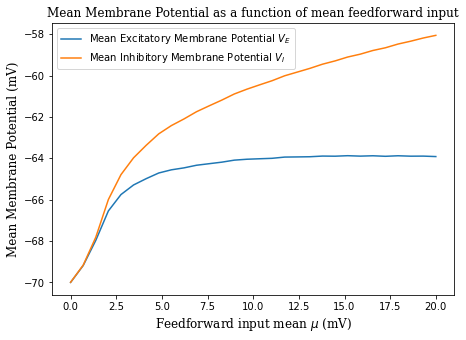

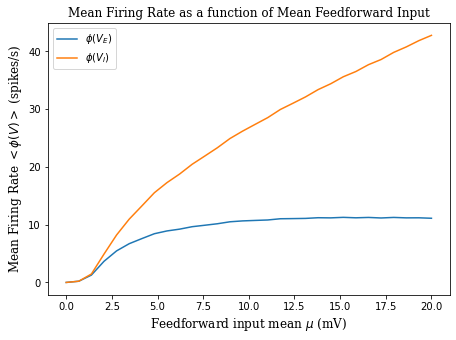

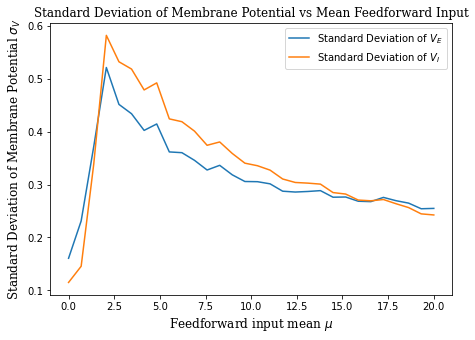

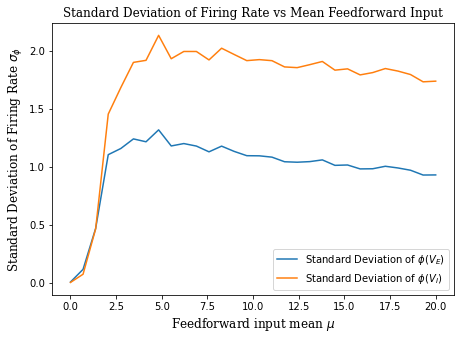

In [9]:
for m in range(len(mu)):
    
    V_e = np.zeros(N_t+1)
    V_i = np.zeros(N_t+1)
    phi_e = np.zeros(N_t+1)
    phi_i = np.zeros(N_t+1)
    
    V_e[0] = V_rest 
    V_i[0] = V_rest 


    for t in range(1,N_t+1):

     
        V_e[t] = np.copy(V_e[t-1] + (dt/tau_e)*(-(V_e[t-1] - V_rest) 
                                                            + W_ee*phi(V_e[t-1]) - W_ei*phi(V_i[t-1]) 
                                                            + mu[m] + sigma_e*np.random.randn()))

        phi_e[t] = np.copy(phi(V_e[t]))

        V_i[t] = np.copy(V_i[t-1] + (dt/tau_i)*(-(V_i[t-1] - V_rest) 
                                                + W_ie*phi(V_e[t-1]) - W_ii*phi(V_i[t-1]) 
                                                            + mu[m] + sigma_i*np.random.randn()))

        phi_i[t] = np.copy(phi(V_i[t]))
        
            
    mean_V_e[m] = np.mean(V_e[t_ss:])
    mean_V_i[m] = np.mean(V_i[t_ss:])
    std_V_e[m] = np.std(V_e[t_ss:])
    std_V_i[m] = np.std(V_i[t_ss:])
    
    mean_phi_e[m] = np.mean(phi_e[t_ss:])
    mean_phi_i[m] = np.mean(phi_i[t_ss:])
    std_phi_e[m] = np.std(phi_e[t_ss:])
    std_phi_i[m] = np.std(phi_i[t_ss:])

f3,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(mu,mean_V_e,label = 'Mean Excitatory Membrane Potential $V_{E}$')
ax.plot(mu,mean_V_i,label = 'Mean Inhibitory Membrane Potential $V_{I}$')
ax.legend(fontsize=10)
plt.title("Mean Membrane Potential as a function of mean feedforward input",fontsize=12,**font)
plt.xlabel("Feedforward input mean $\mu$ (mV)",fontsize=12,**font)
plt.ylabel("Mean Membrane Potential (mV)",fontsize=12,**font)
plt.show()

f4,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(mu,mean_phi_e,label = '$\phi(V_{E})$')
ax.plot(mu,mean_phi_i,label = '$\phi(V_{I})$')
ax.legend(fontsize=10)
plt.title("Mean Firing Rate as a function of Mean Feedforward Input",fontsize=12,**font)
plt.xlabel("Feedforward input mean $\mu$ (mV)",fontsize=12,**font)
plt.ylabel("Mean Firing Rate $<\phi(V)>$ (spikes/s)",fontsize=12,**font)
plt.show()

f5,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(mu,std_V_e,label = 'Standard Deviation of $V_{E}$')
ax.plot(mu,std_V_i,label = 'Standard Deviation of $V_{I}$')
ax.legend(fontsize=10)
plt.title("Standard Deviation of Membrane Potential vs Mean Feedforward Input",fontsize=12,**font)
plt.xlabel("Feedforward input mean $\mu$ ",fontsize=12,**font)
plt.ylabel("Standard Deviation of Membrane Potential $\sigma_{V}$",fontsize=12,**font)
plt.show()

f6,ax = plt.subplots(figsize=(7.2, 5));
ax.plot(mu,std_phi_e,label = 'Standard Deviation of $\phi(V_{E})$')
ax.plot(mu,std_phi_i,label = 'Standard Deviation of $\phi(V_{I})$')
ax.legend(fontsize=10)
plt.title("Standard Deviation of Firing Rate vs Mean Feedforward Input",fontsize=12,**font)
plt.xlabel("Feedforward input mean $\mu$ ",fontsize=12,**font)
plt.ylabel("Standard Deviation of Firing Rate $\sigma_{\phi}$",fontsize=12,**font)
plt.show()
